# Complex Coupling

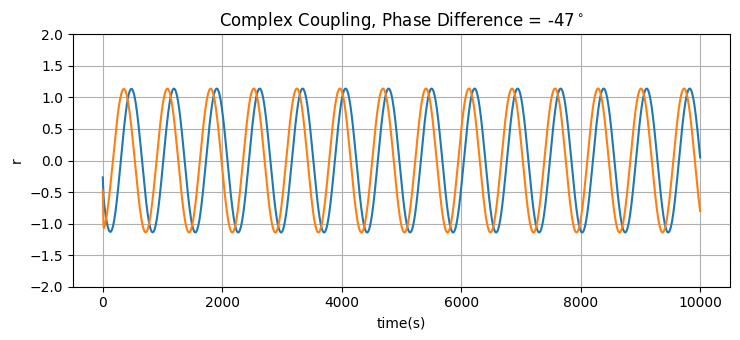

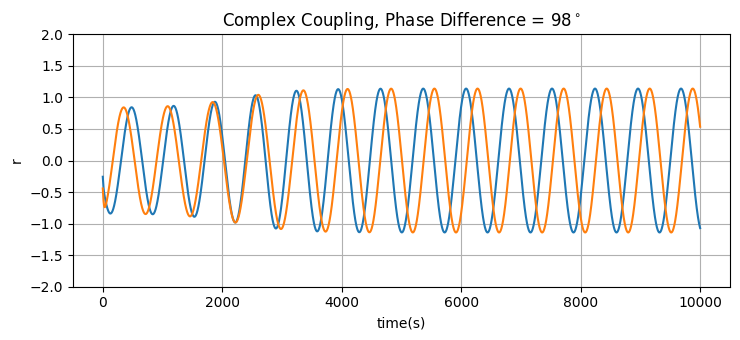

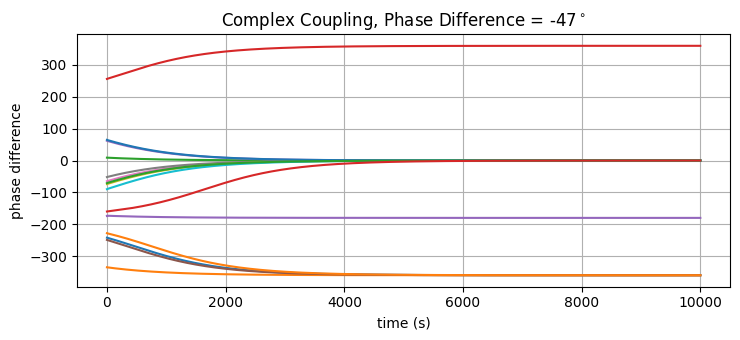

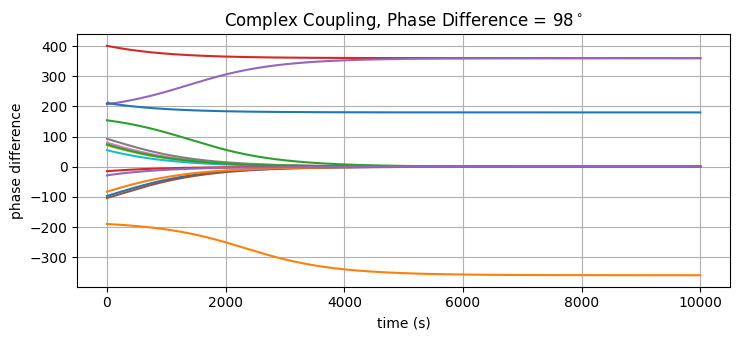

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

#initializing parameters used thoroughly
omega = 5 #omega1 = omega2, hence defined only once
u = 1 # mu
theta = [-47, 98] #phase difference
A = 0.3 #magnitude of complex coupling coeff

#Polar equations for a pair of complex coupled hopf oscillators
#Calulation r1dot
def dr1dt (r1, r2, phi1, phi2, theta):
  return ((u-r1**2)*r1)+(A*r2*np.cos(math.radians(phi2-phi1+theta)))
#calculating r2dot
def dr2dt (r1, r2, phi1, phi2, theta):
  return ((u-r2**2)*r2)+(A*r1*np.cos(math.radians(phi1-phi2-theta)))
#calculating phi1dot
def dphi1dt(r1, r2, phi1, phi2, theta):
  return  omega+(A*(r2/r1)*np.sin(math.radians(phi2-phi1+theta)))
#calculating phi2dot
def dphi2dt(r1, r2, phi1, phi2, theta):
  return omega+(A*(r1/r2)*np.sin(math.radians(phi1-phi2-theta)))

#Integration using Single Forward Euler Integration
def euler_integrate(r1, r2, phi1, phi2, theta, dt, t):
  n = int(t/dt) #no of steps
  #defining lists
  r1_hist, r2_hist = [], []
  phi1_hist, phi2_hist = [], []

  for i in range(n):
    r1_new = r1 + dr1dt(r1, r2, phi1, phi2, theta)*dt
    r2_new = r2 + dr2dt(r1, r2, phi1, phi2, theta)*dt

    r1_hist.append(r1_new)
    r2_hist.append(r2_new)

    phi1_new = phi1 + dphi1dt(r1, r2, phi1, phi2, theta)*dt
    phi2_new = phi2 + dphi2dt(r1, r2, phi1, phi2, theta)*dt

    phi1_hist.append(phi1_new)
    phi2_hist.append(phi2_new)

    r1 ,r2 = r1_new, r2_new
    phi1, phi2 = phi1_new, phi2_new

  return r1_hist, r2_hist, phi1_hist, phi2_hist


#picking initial random variables
random.seed(10)
r1 = random.random()
r2 = random.random()
phi1 = random.randint(-180,180)
phi2 = random.randint(-180,180)
dt = 0.1
t = 1000
x= [0,1]
#plotting oscillating graphs for both theta values
for z in x:
  r1_hist, r2_hist, phi1_hist, phi2_hist = euler_integrate(r1, r2, phi1, phi2, theta[z], dt, t)

  #graph
  plt.rcParams["figure.figsize"] = [7.50, 3.50]
  plt.rcParams["figure.autolayout"] = True
  title = "Complex Coupling, Phase Difference = " + str(theta[z]) + "$^\circ$"
  plt.title(title)
  plt.xlabel("time(s)")
  plt.ylabel("r")
  plt.ylim(-2, 2)
  y1, y2 = [], []
  for val in range(0, 10000): y1.append(r1_hist[val]*np.cos(math.radians(phi1_hist[val])))
  for val in range(0, 10000): y2.append(r2_hist[val]*np.cos(math.radians(phi2_hist[val])))
  plt.plot(range(10000), y1)
  plt.plot(range(10000), y2)
  plt.grid()
  plt.show()



#plotting phase difference graphs for both theta values with different initial conditions
for z in x:
  #generate seed values for random:
  for s in range(0, 150, 10):
    random.seed(s)
    r1 = random.random()
    r2 = random.random()
    phi1 = random.randint(-180,180)
    phi2 = random.randint(-180,180)

    r1_hist, r2_hist, phi1_hist, phi2_hist = euler_integrate(r1, r2, phi1, phi2, theta[z], dt, t)

    phase_difference = []
    for i in range(len(phi1_hist)):
      phase_difference.append(phi2_hist[i] - phi1_hist[i] + theta[z])

    #phase difference graph
    title = "Complex Coupling, Phase Difference = " + str(theta[z]) + "$^\circ$"
    plt.title(title)
    plt.xlabel("time (s)")
    plt.ylabel("phase difference")
    plt.plot(range(len(phase_difference)), phase_difference)
    plt.grid()
  plt.show()




# Power Coupling

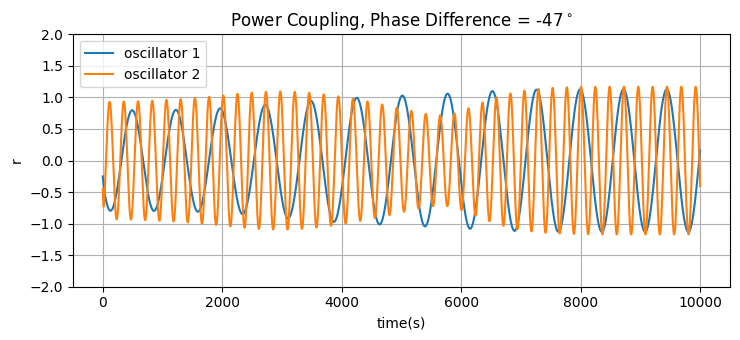

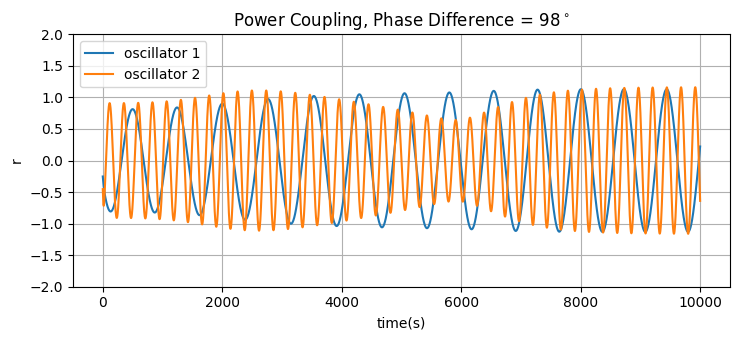

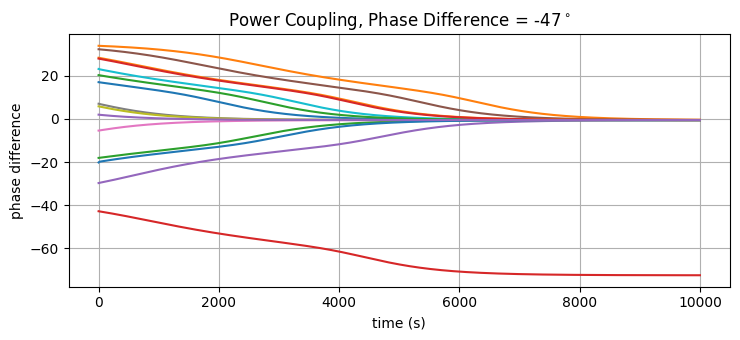

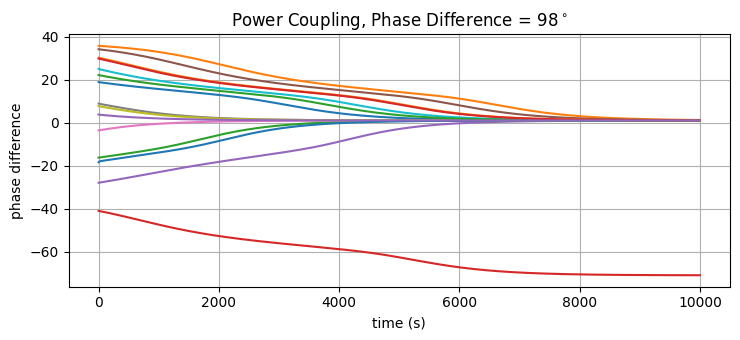

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

#initializing parameters used thoroughly
omega1 = 5
omega2 = 15
u = 1
theta = [-47, 98] #phase difference - angle of complex coupling coeff
A = 0.3 #magnitude of complex coupling coeff (Assume A12 = A21)

#Polar equations for a pair of power coupled hopf oscillators
def dr1dt (r1, r2, phi1, phi2, theta):
  return (u-(r1**2))*r1 + (A*(r2**(omega1/omega2))*np.cos(omega1*math.radians((phi2/omega2)-(phi1/omega1)+(theta/(omega1*omega2)))))
def dphi1dt (r1, r2, phi1, phi2, theta):
  return omega1 + A*((r2**(omega1/omega2))/r1)*np.sin(omega1*math.radians((phi2/omega2)-(phi1/omega1)+(theta/(omega1*omega2))))

def dr2dt (r1, r2, phi1, phi2, theta):
  return (u-(r2**2))*r2 + (A*(r1**(omega2/omega1))*np.cos(omega2*math.radians((phi1/omega1)-(phi2/omega2)+(theta/(omega1*omega2)))))
def dphi2dt (r1, r2, phi1, phi2, theta):
  return omega2 + A*((r1**(omega2/omega1))/r2)*np.sin(omega2*math.radians((phi1/omega1)-(phi2/omega2)+(theta/(omega1*omega2))))


#Initializing random variables
random.seed(10)
r1 = random.random()
r2 = random.random()
phi1 = random.randint(-180,180)
phi2 = random.randint(-180,180)
dt = 0.1 #time step
t = 1000

#Integration using Single Forward Euler Integration
def euler_integrate(r1, r2, phi1, phi2, theta, dt, t):
  n = int(t/dt) #no of steps
  #defining the lists
  r1_hist, r2_hist = [], []
  phi1_hist, phi2_hist = [], []

  for i in range(n):
    r1_new = r1 + dr1dt(r1, r2, phi1, phi2, theta)*dt
    r2_new = r2 + dr2dt(r1, r2, phi1, phi2, theta)*dt

    r1_hist.append(r1_new)
    r2_hist.append(r2_new)

    phi1_new = phi1 + dphi1dt(r1, r2, phi1, phi2, theta)*dt
    phi2_new = phi2 + dphi2dt(r1, r2, phi1, phi2, theta)*dt

    phi1_hist.append(phi1_new)
    phi2_hist.append(phi2_new)

    r1 ,r2 = r1_new, r2_new
    phi1, phi2 = phi1_new, phi2_new

  return r1_hist, r2_hist, phi1_hist, phi2_hist


#plotting oscillating graphs for both theta values
for z in [0,1]:
  r1_hist, r2_hist, phi1_hist, phi2_hist = euler_integrate(r1, r2, phi1, phi2, theta[z], dt, t)

  #oscillating graph
  plt.rcParams["figure.figsize"] = [7.50, 3.50]
  plt.rcParams["figure.autolayout"] = True
  title = "Power Coupling, Phase Difference = " + str(theta[z]) + "$^\circ$"
  plt.title(title)
  plt.xlabel("time(s)")
  plt.ylabel("r")
  plt.ylim(-2, 2)
  y1, y2 = [], []
  for val in range(0, 10000): y1.append(r1_hist[val]*np.cos(math.radians(phi1_hist[val])))
  for val in range(0, 10000): y2.append(r2_hist[val]*np.cos(math.radians(phi2_hist[val])))
  plt.plot(range(10000), y1)
  plt.plot(range(10000), y2)
  plt.grid()
  plt.legend(["oscillator 1", "oscillator 2"])
  plt.show()


#plotting phase difference graphs for both theta values
for z in [0,1]:
  #generate seed values for random:
  for s in range(0, 150, 10):
    random.seed(s)
    r1 = random.random()
    r2 = random.random()
    phi1 = random.randint(-180,180)
    phi2 = random.randint(-180,180)

    r1_hist, r2_hist, phi1_hist, phi2_hist = euler_integrate(r1, r2, phi1, phi2, theta[z], dt, t)

    phase_difference = []
    for i in range(len(phi1_hist)):
      phase_difference.append((phi1_hist[i]/omega1) - (phi2_hist[i]/omega2) + (theta[z]/(omega1*omega2)))

    #phase difference graph
    title = "Power Coupling, Phase Difference = " + str(theta[z]) + "$^\circ$"
    plt.title(title)
    plt.xlabel("time (s)")
    plt.ylabel("phase difference")
    plt.plot(range(len(phase_difference)), phase_difference)
    plt.grid()
  plt.show()




